In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import xarray

# Elevation Data

NOTE: Made two versions just to experiment

In [69]:
path_elevation =  r"../Data/elevation_data/gimpdem_1km_compressed.tif"
data_elevation = xarray.open_dataarray(path_elevation)

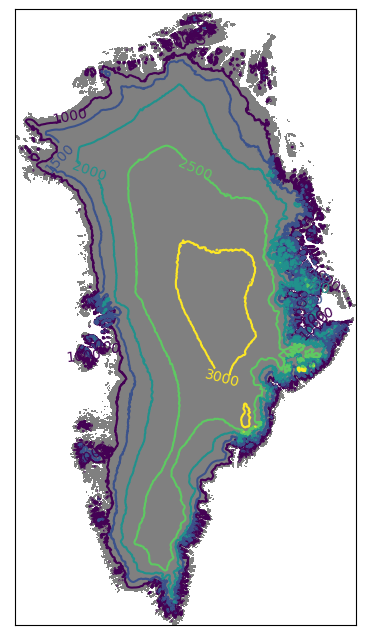

In [71]:
fig = plt.figure(figsize=(10, 8))

c = plt.contour(data_elevation.x, data_elevation.y, data_elevation[0], cmap="viridis",
            levels = list(range(1000, 3001, 500)))
cf = plt.contourf(data_elevation.x, data_elevation.y, data_elevation[0], colors="gray", extend='min')
cf.cmap.set_under('white')
cf.changed()
plt.clabel(c, c.levels, inline=True, fontsize=10)

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

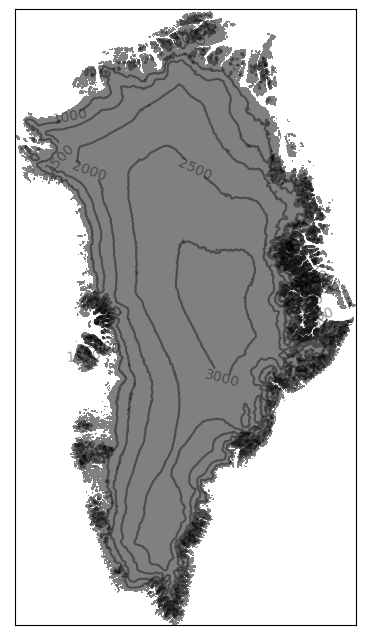

In [72]:
fig = plt.figure(figsize=(10, 8))

c = plt.contour(data_elevation.x, data_elevation.y, data_elevation[0], colors="black", alpha=0.4,
            levels = list(range(1000, 3001, 500)))
cf = plt.contourf(data_elevation.x, data_elevation.y, data_elevation[0], colors="gray", extend='min')
cf.cmap.set_under('white')
cf.changed()
plt.clabel(c, c.levels, inline=True, fontsize=10)

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# Elavation Data + Prediction Data + Microwave Grid

TODO:
- Figure out how to remove elevation data for coastal region (see black fuzzy wuzzy at central east) --> maybe asking Baptiste because he managed for his plots
- Optimize hatch
- Make coastal region gray

NOTE: Check https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html for hatches documentation

In [77]:
data_pred_path = "test_prediction_out2.tif"
data_pred = xarray.open_dataarray(data_pred_path)

In [78]:
path_elevation =  r"../Data/elevation_data/gimpdem_1km_compressed.tif"
data_elevation = xarray.open_dataarray(path_elevation)

data_elevation = data_elevation.where(data_elevation.x <= data_pred.x.max(), drop=True)     # crop to the same extent (x)
data_elevation = data_elevation.where(data_elevation.y >= data_pred.y.min(), drop=True)     # crop to the same extent (y)

In [79]:
data_mw_path = "../Data/microwave-rs/mw_interpolated/2019-07-01_mw.tif"
data_mw = xarray.open_dataarray(data_mw_path)
data_mw = data_mw.where(data_mw == 1, drop=True)

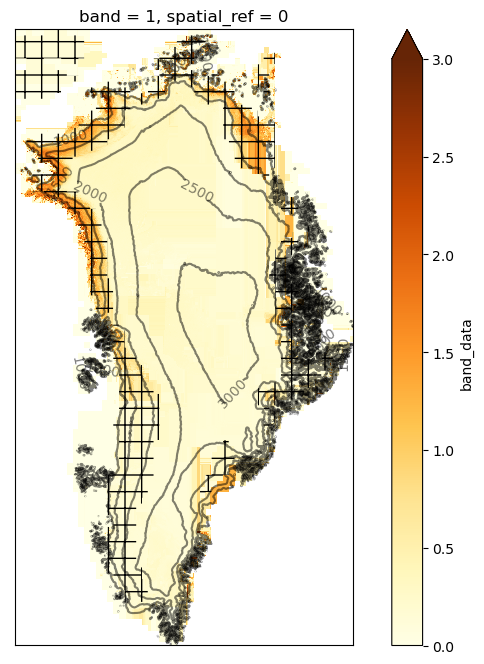

In [127]:
fig = plt.figure(figsize = (10, 8))

# Prediction Data
data_pred.plot(cmap="YlOrBr", vmax=3, label="Snow Optical Grain Diameter (mm)")   # set max of colorbar = 3 to make melting more clear as most values are below 3 

# ELevation Data
e = plt.contour(data_elevation.x, data_elevation.y, data_elevation[0] , colors="black", alpha=0.5,
            levels = list(range(1000, 3001, 500)))
plt.clabel(e, e.levels, inline=True, fontsize=10)

# Microwave Data
m = plt.contourf(data_mw.x, data_mw.y, data_mw[0], hatches=["+"], alpha=0) # adapt hatches (grid) by replacing with "++" or "+++"

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

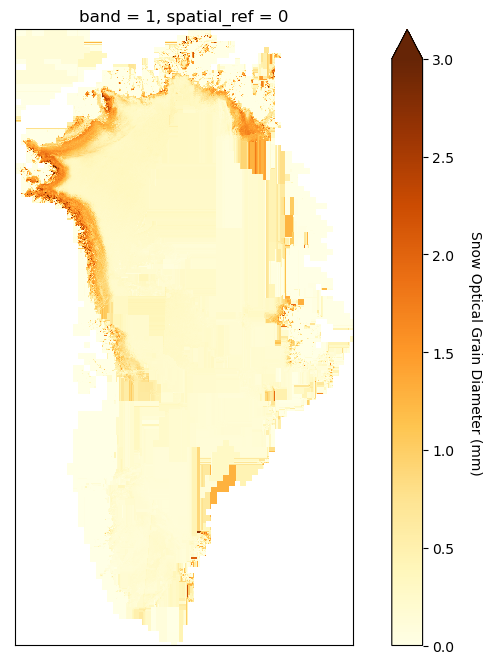

In [130]:
fig = plt.figure(figsize = (10, 8))

# Prediction Data
p = data_pred.plot(cmap="YlOrBr", vmax=3)   # set max of colorbar = 3 to make melting more clear as most values are below 3 
cax = plt.gcf().get_axes()[1]
cax.set_ylabel("Snow Optical Grain Diameter (mm)", rotation=270, labelpad=20)

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)